In [7]:
# Dependencies and Setup
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Outline stylesheet to use for plots
plt.style.use('seaborn-darkgrid')

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls

In [10]:
# Create a settings dictionary with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [11]:
# Store base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set up lists to hold reponse info
clouds = []
country = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processing request for {city}")
    response = requests.get(url + "appid=" + api_key + "&q=" + city +"&units=imperial").json()
    try:
        clouds.append(response["clouds"]["all"])
    except KeyError:
        clouds.append("NaN")
    try:
        country.append(response["sys"]["country"])
    except KeyError:
        country.append("NaN")
    try:
        humidity.append(response["main"]["humidity"])
    except KeyError:
        humidity.append("NaN")
    try:
        lat.append(response["coord"]["lat"])
    except KeyError:
        lat.append("NaN")
    try:
        lon.append(response["coord"]["lon"])
    except KeyError:
        lon.append("NaN")
    try:
        max_temp.append(response["main"]["temp_max"])
    except KeyError:
        max_temp.append("NaN")
    try:
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        wind_speed.append("NaN")

Processing request for barreirinha
Processing request for tilichiki
Processing request for marawi
Processing request for pisco
Processing request for rikitea
Processing request for svobodnyy
Processing request for busselton
Processing request for te anau
Processing request for kapaa
Processing request for saint george
Processing request for sakakah
Processing request for nanortalik
Processing request for saskylakh
Processing request for albany
Processing request for mataura
Processing request for hermanus
Processing request for pevek
Processing request for kodiak
Processing request for puerto ayora
Processing request for luderitz
Processing request for buraydah
Processing request for tiksi
Processing request for vardo
Processing request for bredasdorp
Processing request for chokurdakh
Processing request for richards bay
Processing request for tautira
Processing request for arraial do cabo
Processing request for sampit
Processing request for amderma
Processing request for mangrol
Proces

Processing request for north battleford
Processing request for palabuhanratu
Processing request for esperance
Processing request for westport
Processing request for sao felix do xingu
Processing request for port-gentil
Processing request for nioro
Processing request for kantunilkin
Processing request for yantal
Processing request for leh
Processing request for san andres
Processing request for kpandae
Processing request for grecesti
Processing request for kohlu
Processing request for tambovka
Processing request for luoyang
Processing request for chuy
Processing request for mao
Processing request for xichang
Processing request for caibarien
Processing request for temaraia
Processing request for souillac
Processing request for los algarrobos
Processing request for rabo de peixe
Processing request for ondorhaan
Processing request for padang
Processing request for tocopilla
Processing request for crotone
Processing request for contamana
Processing request for raahe
Processing request for p

Processing request for vrangel
Processing request for nara
Processing request for sulangan
Processing request for jakar
Processing request for hurghada
Processing request for puerto narino
Processing request for half moon bay
Processing request for dali
Processing request for cayenne
Processing request for ulladulla
Processing request for westpunt
Processing request for smithers
Processing request for okhotsk
Processing request for sinop
Processing request for makow mazowiecki
Processing request for evanston
Processing request for yinchuan
Processing request for karamea
Processing request for poum
Processing request for ous
Processing request for lorengau
Processing request for zima
Processing request for mazagao
Processing request for mizque
Processing request for aguimes
Processing request for papara
Processing request for monrovia
Processing request for farah
Processing request for fallon
Processing request for fayaoue
Processing request for kaifeng
Processing request for hualmay
Pr

### Convert Raw Data to DataFrame

In [12]:
# create a dictionary from cities and response values
weather_dict = {
    "city": cities,
    "clouds": clouds,
    "country": country,
    "humidity": humidity,
    "lat": lat,
    "lon": lon,
    "max_temp": max_temp,
    "wind_speed": wind_speed
}

#Convert dictionary to dataframe
weather_data = pd.DataFrame(weather_dict)

#Preview dataframe
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed
0,barreirinha,100,BR,84,-2.79,-57.07,77.32,3.11
1,tilichiki,100,RU,98,60.47,166.1,33.39,32.41
2,marawi,23,PH,74,8,124.29,82.99,7
3,pisco,100,PE,73,-13.7,-76.22,75.2,4.7
4,rikitea,4,PF,76,-23.12,-134.97,77.65,12.12


In [13]:
#Add today's date to dataframe
date = pd.Timestamp("today").strftime("%m/%d/%Y")
weather_data["date"] = date

#Preview dataframe with new column
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed,date
0,barreirinha,100,BR,84,-2.79,-57.07,77.32,3.11,03/11/2020
1,tilichiki,100,RU,98,60.47,166.1,33.39,32.41,03/11/2020
2,marawi,23,PH,74,8,124.29,82.99,7,03/11/2020
3,pisco,100,PE,73,-13.7,-76.22,75.2,4.7,03/11/2020
4,rikitea,4,PF,76,-23.12,-134.97,77.65,12.12,03/11/2020


In [14]:
#Convert NaN from string to float
nan_value = float("NaN")
weather_data.replace("NaN", nan_value, inplace=True)

#Remove all NaN rows
weather_data_final = weather_data.dropna()
#Preview dataframe
weather_data_final.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed,date
0,barreirinha,100.0,BR,84.0,-2.79,-57.07,77.32,3.11,03/11/2020
1,tilichiki,100.0,RU,98.0,60.47,166.10,33.39,32.41,03/11/2020
2,marawi,23.0,PH,74.0,8.00,124.29,82.99,7.00,03/11/2020
3,pisco,100.0,PE,73.0,-13.70,-76.22,75.20,4.70,03/11/2020
4,rikitea,4.0,PF,76.0,-23.12,-134.97,77.65,12.12,03/11/2020


In [16]:
#Save dataframe to csv
weather_data_csv_path = os.path.join("Results","weather_data.csv")
weather_data_html_path = os.path.join("Results","weather_data.html")
weather_data_final.to_csv(weather_data_csv_path)
weather_data_final.to_csv(weather_data_html_path)

### Plotting the Data

#### Latitude vs. Temperature Plot

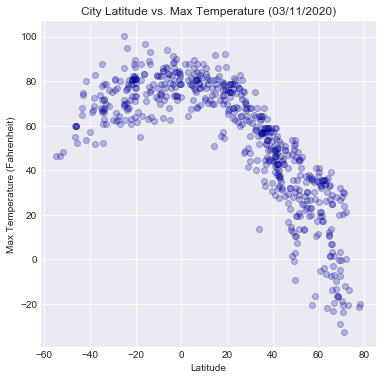

In [18]:
#Create scatter plot showing the relationship of latitude and max temperatures for today
plt.figure(figsize=(6,6))
plt.scatter(weather_data_final.lat, weather_data_final.max_temp, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.savefig(os.path.join("Results","max_temp-latitude.png"),dpi=200)
plt.show()

#### Latitude vs. Humidity Plot

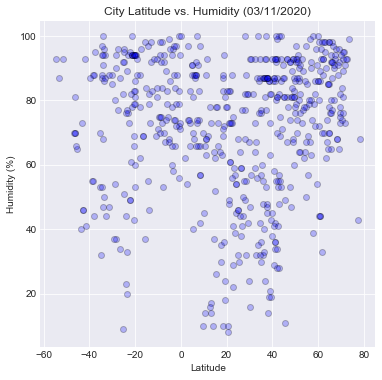

In [19]:
#Create scatter plot showing the relationship of latitude and humidity for today
plt.figure(figsize=(6,6))
plt.scatter(weather_data_final.lat, weather_data_final.humidity, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(os.path.join("Results","humidity-latitude.png"),dpi=200)
plt.show()

#### Latitude vs. Cloudiness Plot

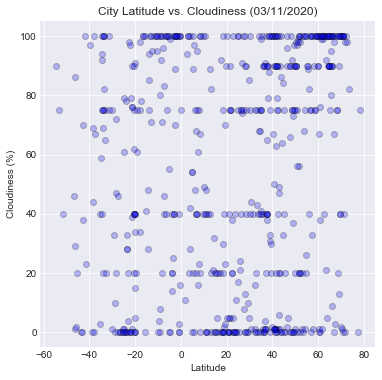

In [20]:
#Create scatter plot showing the relationship of latitude and cloudiness for today
plt.figure(figsize=(6,6))
plt.scatter(weather_data_final.lat, weather_data_final.clouds, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(os.path.join("Results","cloudiness-latitude.png"),dpi=200)
plt.show()

#### Latitude vs. Wind Speed Plot

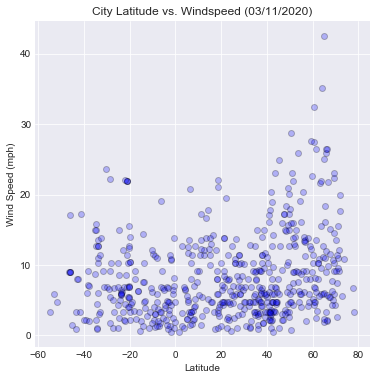

In [21]:
#Create scatter plot showing the relationship of latitude and wind speed for today
plt.figure(figsize=(6,6))
plt.scatter(weather_data_final.lat, weather_data_final.wind_speed, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(os.path.join("Results","wind_speed-latitude.png"),dpi=200)
plt.show()

### Today's Weather
* As expected, today's max temperatures were highest in cities closest to the equator. As you move away from the equator, the day's max temperatures drops.
* The majority of cities measured saw humidity levels of 70% and above today regardless of their proximity to the equator.
* The wind speed in most cities was low today with the bulk of the cities measured showing wind speeds under 10 mph regardless of their latitudnal position.